# Polynomial Regression Exercises

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 62.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_boston

## Problem 1: Creating and Visualizing data for 1 feature model

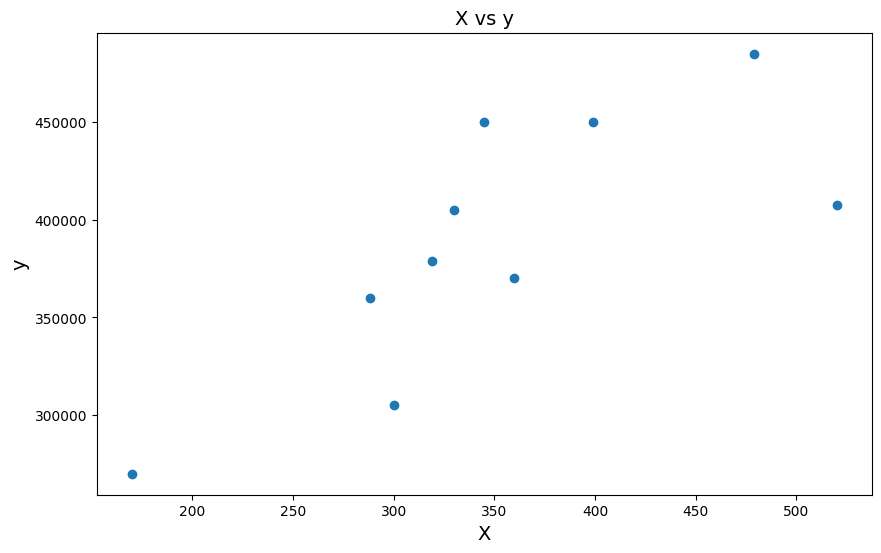

In [ ]:
#Making and visualizing data
#X=np.array([1,2,3,4,5]).reshape(-1,1)
#y=np.array([20, 45, 56, 64, 70]).reshape(-1,1)
X=np.array([300,170,288,360,319,330,520,345,399,479]).reshape(-1,1)
y=np.array([305000,270000,360000,370000,379000,405000,407500,450000,450000,485000]).reshape(-1,1)

#Plotting the data
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('X vs y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.show()

- In the above plot we can see that distribution of data is somewhat non-linear.

### Model 1: Linear Regression
$$y=\theta_0+\theta_1X$$

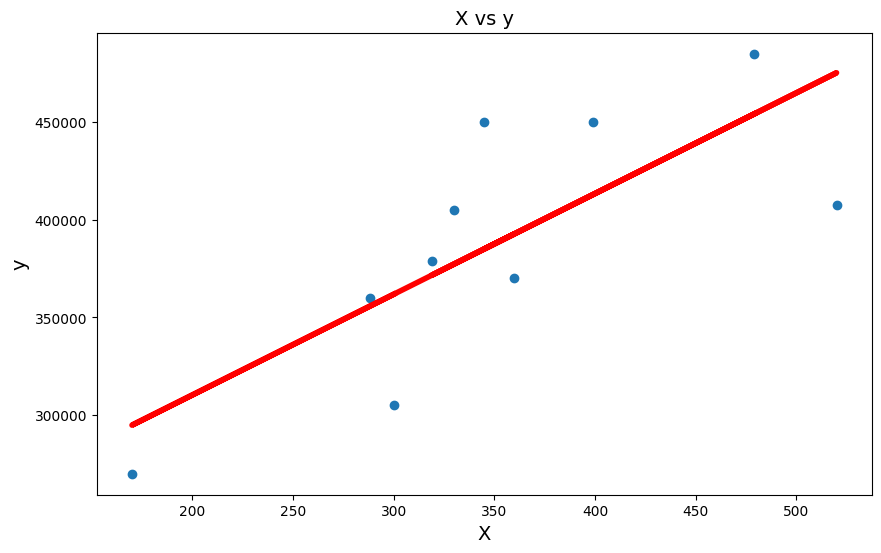

R_square score: 0.5889136638652293
Rsq-myfunc:  [0.58891366]
theta_0: 207241.3942514915
theta_1: 515.4091331866339
Number of non-zero features: 1
CPU times: user 228 ms, sys: 101 ms, total: 329 ms
Wall time: 220 ms


In [ ]:
%%time

model1=LinearRegression()
model1.fit(X,y)
def Rsq(yt,model):
    yp=model1.predict(X)
    ym=sum(yt)/len(yt)
    ym=ym[0]
    num=0
    den=0
    for i in range(len(yt)):
      num+=(yt[i]-yp[i])**2
      den+=(yt[i]-ym)**2
    rsq=1-(num/den)
    return rsq

#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('X vs y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.plot(X,model1.predict(X),color='red',linewidth=4)
plt.show()

print('R_square score:',model1.score(X,y))
print("Rsq-myfunc: ",Rsq(y,model1))
print('theta_0:',model1.intercept_[0])
print('theta_1:',model1.coef_[0][0])
print('Number of non-zero features:',np.sum(model1.coef_ != 0))

### Model 2: Polynomial Regression with degree 2 polynomial
$$y=\theta_0+\theta_1X+\theta_2X^2$$

The implementation of polynomial regression is a two-step process.
First, we transform our data into a polynomial using the PolynomialFeatures function from sklearn and,
then use linear regression to fit the parameters.

In [ ]:
#Converting linear function to polynomial function of degree 2
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X)
#X_poly is ndarray having three columns:
#First one is a constant to represent X_0,
#Second is X_1=X
#Third is X_2=X**2, simply square of X
X_poly2

array([[1.00000e+00, 3.00000e+02, 9.00000e+04],
       [1.00000e+00, 1.70000e+02, 2.89000e+04],
       [1.00000e+00, 2.88000e+02, 8.29440e+04],
       [1.00000e+00, 3.60000e+02, 1.29600e+05],
       [1.00000e+00, 3.19000e+02, 1.01761e+05],
       [1.00000e+00, 3.30000e+02, 1.08900e+05],
       [1.00000e+00, 5.20000e+02, 2.70400e+05],
       [1.00000e+00, 3.45000e+02, 1.19025e+05],
       [1.00000e+00, 3.99000e+02, 1.59201e+05],
       [1.00000e+00, 4.79000e+02, 2.29441e+05]])

In [ ]:
#Converting ndarray to DataFrame and dropping the constant (first column)
X_poly2=pd.DataFrame(X_poly2)
X_poly2=X_poly2.drop([0],axis=1)
X_poly2

,1,2
0,300.0,90000.0
1,170.0,28900.0
2,288.0,82944.0
3,360.0,129600.0
4,319.0,101761.0
5,330.0,108900.0
6,520.0,270400.0
7,345.0,119025.0
8,399.0,159201.0
9,479.0,229441.0


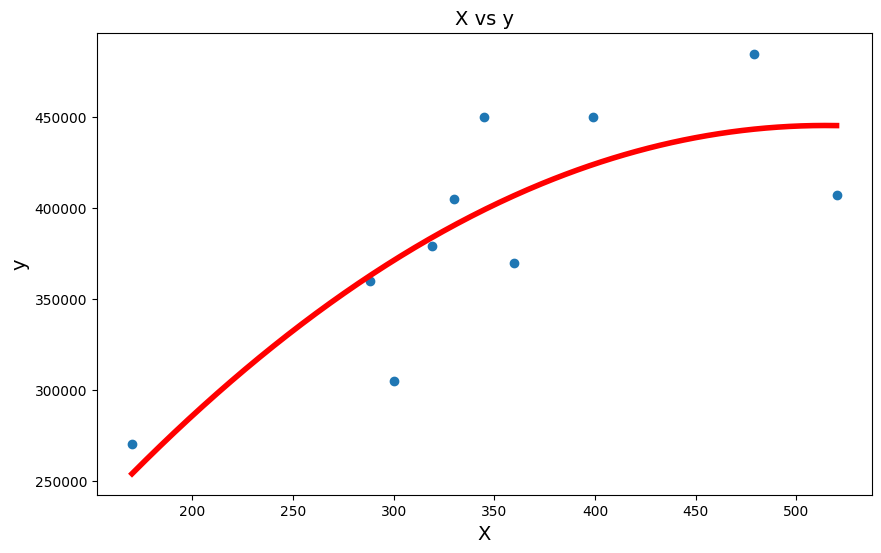

R_squared score: 0.6810985878421546
theta_0: 18030.177831701934
theta_1: [ 1.66223492e+03 -1.61588516e+00]
Number of non-zero features: 2


In [ ]:
#now X_poly has two feature: X_1=X and X_2=X**2

#now fitting linear model to it
model2=LinearRegression()
model2.fit(X_poly2,y)

#generating data for line plot, for smoother curve
X_data=np.linspace(X.min(),X.max(),300).reshape(-1,1)
X_data_poly2 = pd.DataFrame(poly2.fit_transform(X_data)).drop([0],axis=1)
X_data_poly2


#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('X vs y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
#plt.plot(X,model2.predict(X_poly2),color='red',linewidth=4)
plt.plot(X_data,model2.predict(X_data_poly2),color='red',linewidth=4)
plt.show()

print('R_squared score:',model2.score(X_poly2,y))
print('theta_0:',model2.intercept_[0])
print('theta_1:',model2.coef_[0])
print('Number of non-zero features:',np.sum(model2.coef_ != 0))

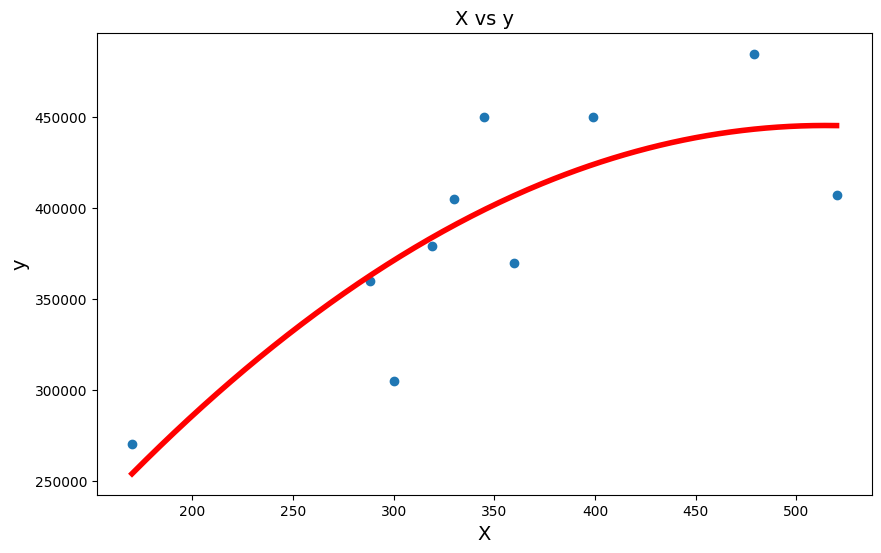

R_square score: 0.6810985878421545
CPU times: user 237 ms, sys: 102 ms, total: 339 ms
Wall time: 226 ms


In [ ]:
%%time

#An alternate, shorter form form Model 2
model2a=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
model2a.fit(X,y)

#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('X vs y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.plot(X_data,model2a.predict(X_data),color='red',linewidth=4)
plt.show()

print('R_square score:',model2a.score(X,y))

### Model 3: Polynomial Regression with degree 9 polynomial
$$y=\theta_0+\theta_1X+\theta_2X^2+\theta_3X^3+\theta_4X^4+\theta_5X^5+\theta_6X^6+\theta_7X^7+\theta_8X^8+\theta_9X^9$$


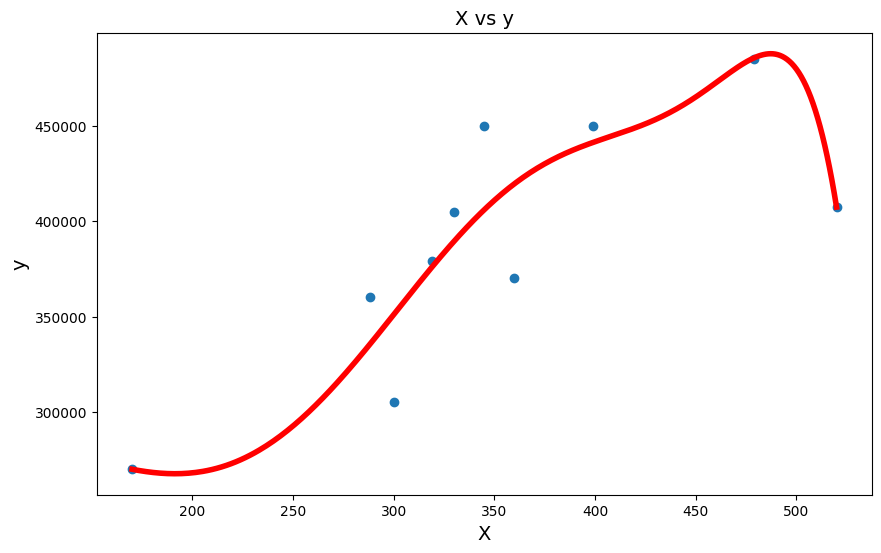

R_square score: 0.8125713702381573
theta_0: 295020.6013474539
theta_1: [-2.31472463e-15 -3.13544510e-09 -1.55631357e-10 -2.27463662e-08
 -1.93262975e-06  1.95439465e-08 -7.17953309e-11  1.15108836e-13
 -6.83705101e-17]
Number of non-zero features: 9
CPU times: user 228 ms, sys: 99.9 ms, total: 327 ms
Wall time: 221 ms


In [ ]:
%%time

#Converting linear function to polynomial function of degree 9 using the longer method

poly3 = PolynomialFeatures(degree=9)
X_poly3 = poly3.fit_transform(X)

X_poly3=pd.DataFrame(X_poly3)
X_poly3=X_poly3.drop([0],axis=1)

model3=LinearRegression()
model3.fit(X_poly3,y)

#Generating data for line plot, for smoother curve
X_data=np.linspace(X.min(),X.max(),300).reshape(-1,1)
X_data_poly3 = pd.DataFrame(poly3.fit_transform(X_data)).drop([0],axis=1)

#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('X vs y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.plot(X_data,model3.predict(X_data_poly3),color='red',linewidth=4)
plt.show()

print('R_square score:',model3.score(X_poly3,y))
print('theta_0:',model3.intercept_[0])
print('theta_1:',model3.coef_[0])
print('Number of non-zero features:',np.sum(model3.coef_ != 0))

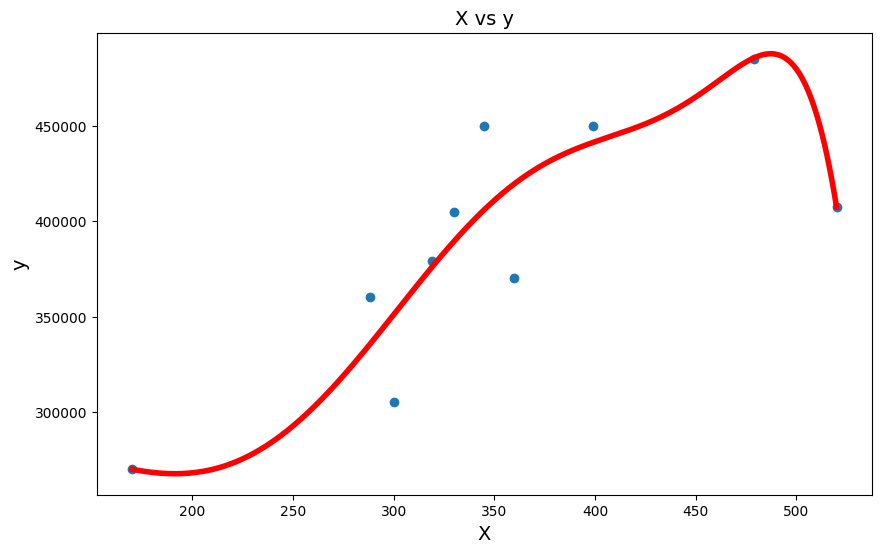

R_squared score: 0.8125713702371542
CPU times: user 226 ms, sys: 105 ms, total: 331 ms
Wall time: 220 ms


In [ ]:
%%time

#An alternate, shorter form form Model 3
model3a=make_pipeline(PolynomialFeatures(degree=9),LinearRegression())
model3a.fit(X,y)

#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('X vs y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.plot(X_data,model3a.predict(X_data),color='red',linewidth=4)
plt.show()

print('R_squared score:',model3a.score(X,y))

## Problem 2: Creating and Visualizing data for Multi-feature model
### Revisiting the Boston house pricing example again
- The models in Problem 2 are number 4 and 5 just to avoid name clashes with models of problem 1.

In [ ]:
#Loading and visualizing data
boston_dataset = load_boston()
dataset = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
dataset['PRICE'] = boston_dataset.target
target = dataset['PRICE']
features = dataset.drop('PRICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

### Model 4: Linear Regression

In [ ]:
%%time

model4 = LinearRegression()
model4.fit(X_train, y_train)

print('Training data r-square:', model4.score(X_train, y_train))
print('Test data r-square:', model4.score(X_test, y_test))
print('Number of non-zero features:',np.sum(model4.coef_ != 0))

Training data r-square: 0.750121534530608
Test data r-square: 0.6709339839115633
Number of non-zero features: 13
CPU times: user 15.6 ms, sys: 469 µs, total: 16 ms
Wall time: 18.4 ms


### Model 5: Polynomial Regression

In [ ]:
%%time

deg=9 #try 3
X_train_poly2=PolynomialFeatures(degree=deg).fit_transform(X_train)
X_train_poly2=pd.DataFrame(X_train_poly2)
X_train_poly2=X_train_poly2.drop([0],axis=1)
model5=LinearRegression()
model5.fit(X_train_poly2,y_train)

print('Training data r-square:', model5.score(X_train_poly2, y_train))
X_test_poly2=PolynomialFeatures(degree=deg).fit_transform(X_test)
X_test_poly2=pd.DataFrame(X_test_poly2)
X_test_poly2=X_test_poly2.drop([0],axis=1)
print('Test data r-square:', model5.score(X_test_poly2, y_test))
print('Number of non-zero features:',np.sum(model5.coef_ != 0))

Training data r-square: 1.0
Test data r-square: -412.17319895279195
Number of non-zero features: 497419
CPU times: user 1min 31s, sys: 12.9 s, total: 1min 44s
Wall time: 1min 7s


In [ ]:
%%time

deg=3 #try 3
X_train_poly2=PolynomialFeatures(degree=deg).fit_transform(X_train)
X_train_poly2=pd.DataFrame(X_train_poly2)
X_train_poly2=X_train_poly2.drop([0],axis=1)
model5=LinearRegression()
model5.fit(X_train_poly2,y_train)

print('Training data r-square:', model5.score(X_train_poly2, y_train))
X_test_poly2=PolynomialFeatures(degree=deg).fit_transform(X_test)
X_test_poly2=pd.DataFrame(X_test_poly2)
X_test_poly2=X_test_poly2.drop([0],axis=1)
print('Test data r-square:', model5.score(X_test_poly2, y_test))
print('Number of non-zero features:',np.sum(model5.coef_ != 0))

Training data r-square: 0.999999999999999
Test data r-square: -985.6895637016264
Number of non-zero features: 559
CPU times: user 90.5 ms, sys: 78.8 ms, total: 169 ms
Wall time: 100 ms


In [ ]:
##For degree=9, the model is also capturing the noise in the data. This is an example of over-fitting.